# Problem Statement


- The task is of forecasting daily cases for the next 3 months for 2 different business segments aggregated at the country level keeping in consideration the following major Indian festivals (inclusive but not exhaustive list): Diwali, Dussehra, Ganesh Chaturthi, Navratri, Holi, etc. (You are free to use any publicly available open-source external datasets). Some other examples could be:
   - Weather
   - Macroeconomic variables, etc.
 
- The train data was provided in the following way:
   - For business segment 1, historical data was made available at branch ID level
   - For business segment 2, historical data was made available at the state level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Time Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [2]:
df=pd.read_csv('C:/Users/Administrator/Desktop/Python/Kaggle/AV/train_fwYjLYX.csv')

In [3]:
df.shape

(80402, 6)

In [4]:
df.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [6]:
# Chaging the data type of application_date to datetime
df['application_date']=pd.to_datetime(df['application_date'])
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null datetime64[ns]
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
# Dividing the dataset into two segments
segment1=df.query('segment==1')
segment2=df.query('segment==2')

# Lets look at minimum and maximum date along with case_count for both segments
- Note:
  - Grouping segment1 by branch_id as data has been collected on branch level for segment1.
  - Grouping segment2by state as data has been collected on state level for segment2.

In [8]:
seg1=segment1.groupby(["branch_id"]).agg({"application_date":["min",'max'],"case_count":"mean"})
seg2=segment2.groupby(["state"]).agg({"application_date":["min",'max'],"case_count":"mean"})

- Lets take a peak at top 10 rows of both the segments

In [9]:
seg1.head(10)  # This is for segment 1

application_date             case_count
                       min        max        mean
branch_id                                        
1.0             2017-04-01 2019-07-05  159.656328
3.0             2017-04-01 2019-07-05  168.486352
5.0             2017-04-01 2019-07-05  155.548387
7.0             2017-04-01 2019-07-05   35.950372
8.0             2017-04-01 2019-07-05   39.868486
9.0             2017-04-01 2019-07-05   34.856079
10.0            2017-04-01 2019-07-05   48.457816
11.0            2017-04-01 2019-07-05   46.151365
13.0            2017-04-01 2019-07-05   31.545906
14.0            2017-04-01 2019-07-05   20.150124

In [10]:
seg2.head(10)  # This is for segment 2

application_date              case_count
                            min        max         mean
state                                                  
ASSAM                2017-04-01 2019-07-23   764.234597
BIHAR                2017-04-01 2019-07-23  1554.239336
CHHATTISGARH         2017-04-01 2019-07-23   350.644550
GUJARAT              2017-04-01 2019-07-23   346.502370
HARYANA              2017-04-01 2019-07-23     0.000000
JHARKHAND            2017-04-01 2019-07-23   158.571090
KARNATAKA            2017-04-01 2019-07-23  1836.650474
KERALA               2017-04-01 2019-07-23   958.420616
MADHYA PRADESH       2017-04-01 2019-07-23   641.349526
MAHARASHTRA          2017-04-01 2019-07-23   340.305687

# Adding Month column to the dataframe to get the count of cases received per month

### Segment 1 :

In [11]:
segment1['Month']=segment1['application_date'].dt.month

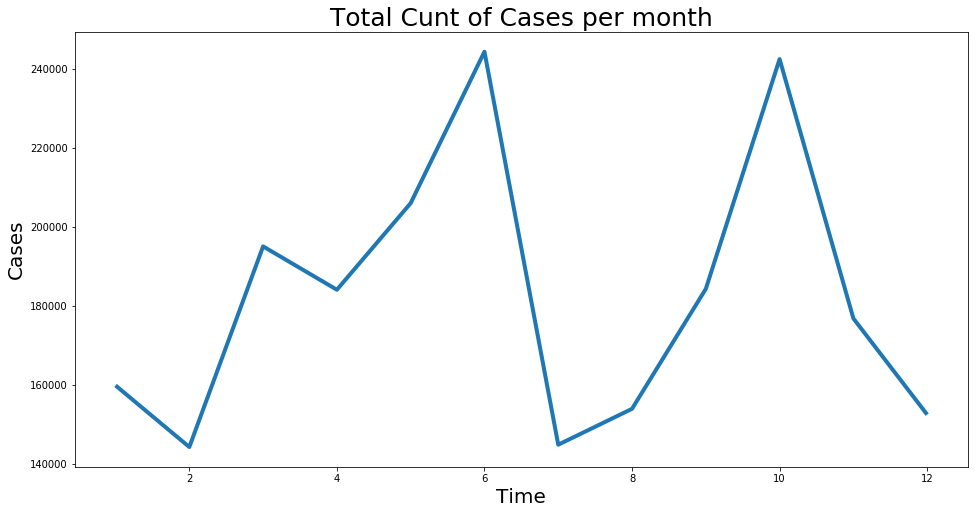

In [12]:
ts1=segment1.groupby('Month')['case_count'].sum()
plt.figure(figsize=(16,8))
plt.title('Total Cunt of Cases per month',fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.style.use('fivethirtyeight')
plt.plot(ts1);

- From above we can infer that :
  - Count of cases for starting few month indicates decreasing rate.
  - Count of cases touches peak twice in a year i.e. in the months of April-June and August-October.
  - Count of cases starts decreasing at a very high pace in the months of June-July.

### Segment 2 :

In [13]:
segment2['Month']=segment2['application_date'].dt.month

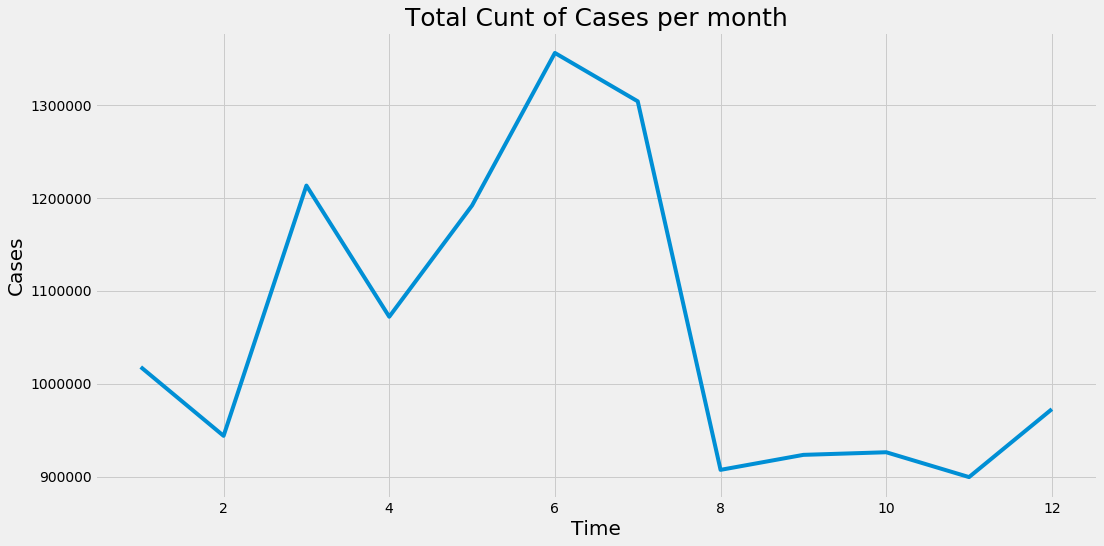

In [14]:
ts2=segment2.groupby('Month')['case_count'].sum()
plt.figure(figsize=(16,8))
plt.title('Total Cunt of Cases per month',fontsize=25)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.style.use('fivethirtyeight')
plt.plot(ts2);

- From above we can infer that :
  - Count of cases for starting few month indicates decreasing rate.
  - Count of cases touches peak in the months of April-June.
  - Count os cases starts decreasing at a very high pace in the months of July-August.

# Trend, seasonality and residuals

### segment 1 : 

In [15]:
# Creating a copy of segment1
seg1_copy=segment1.copy()
# Setting application_date as the index
seg1_copy.set_index('application_date',inplace=True)

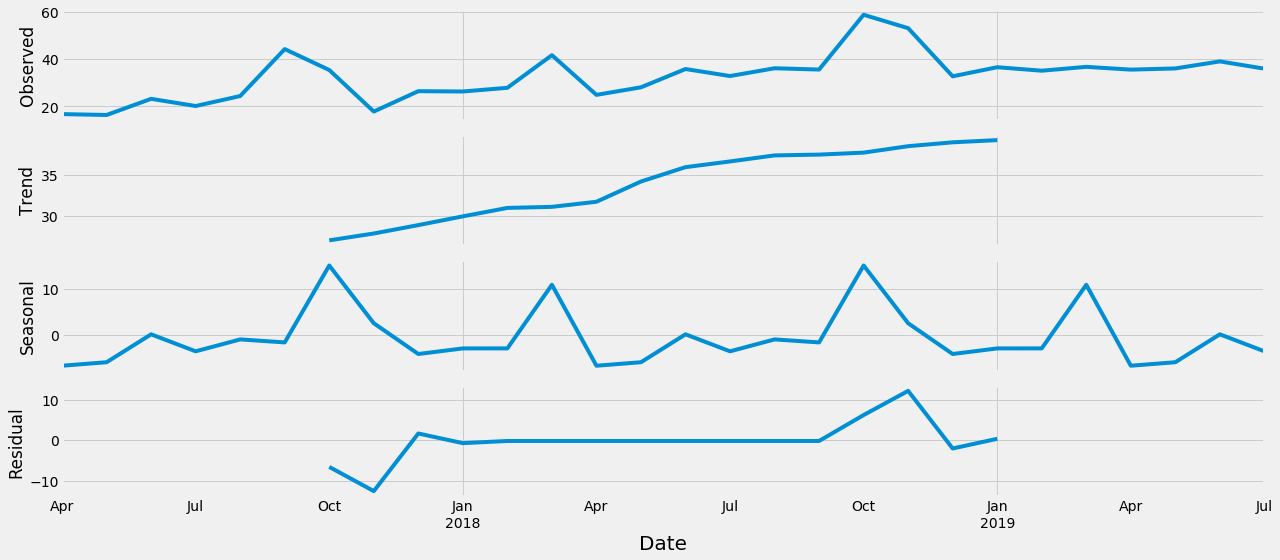

In [16]:
import statsmodels.api as sm
from pylab import rcParams
y1=seg1_copy['case_count'].resample('MS').mean()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1,model='additive')
fig = decomposition.plot()
plt.xlabel('Date',fontsize=20)
plt.show()

- From above we can infer that:
    - Trend is going in upward direction.
    - There have been peak touch in the year 2017 in the months of August-November and in 2018 year in the months of October-December.
    - There is an obvious Seasonality.

### segment 2 :

In [17]:
# Creating a copy of segment2
seg2_copy=segment2.copy()
# Setting application_date as the index
seg2_copy.set_index('application_date',inplace=True)

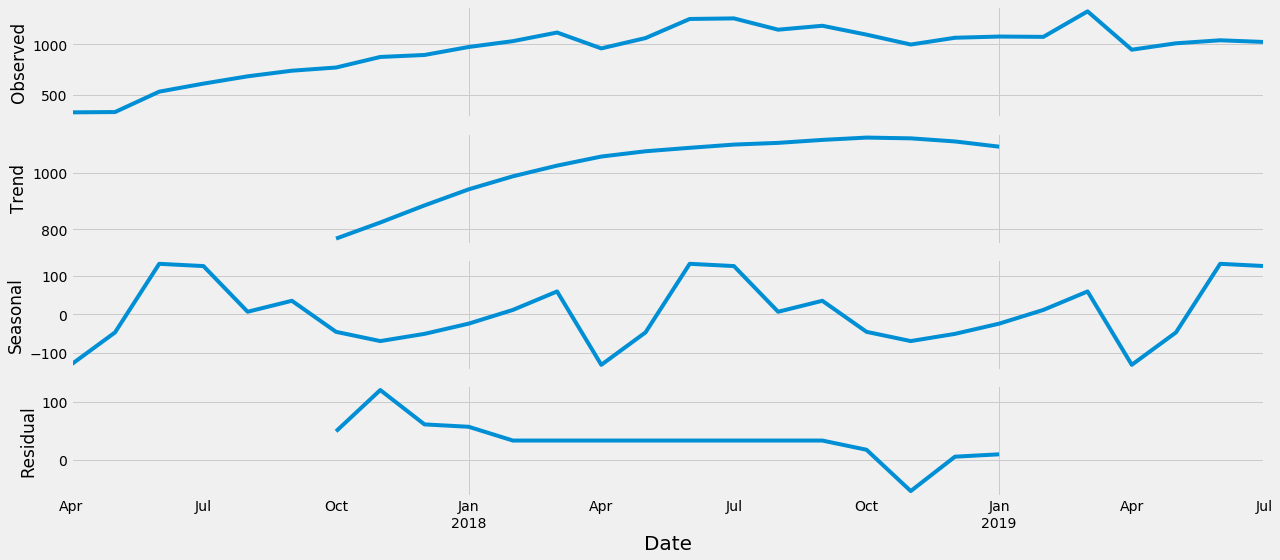

In [18]:
import statsmodels.api as sm
from pylab import rcParams
y2=seg2_copy['case_count'].resample('MS').mean()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2,model='additive')
fig = decomposition.plot()
plt.xlabel('Date',fontsize=20)
plt.show()

- From above we can infer that:
    - Trend is going in upward direction and becoming constant after certain period.
    - Obvious Seasonality can be observed.

# Stationarity

- Stationarity means:
  - The mean of the series should not be the function of the time.
  - The variance of the series should not be the function of the time.
  - The co-variance of ith term and (i+m)th term should not be the function of time.

### Checking Stationarity

- We use Dickey Fuller test to check the stationarity of the series.
- The intuition behind this test is that it determines how strongly a time series is defined by a trend.
- The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
- The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
-  If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

- Checking stationarity for both segments

In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(segment1['case_count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.817436
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(segment2['case_count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
     print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.140244
p-value: 0.023715
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


- From above results we have observed that:
  - Both segments are following stationarity as p-value for both segments is less than 5%.

# Grouping both segments based on dates

In [21]:
segment1=pd.DataFrame(segment1.groupby('application_date')['case_count'].sum())
segment2=pd.DataFrame(segment2.groupby('application_date')['case_count'].sum())

In [22]:
segment1.head()

,case_count
application_date,
2017-04-01,299.0
2017-04-03,42.0
2017-04-04,23.0
2017-04-05,1530.0
2017-04-07,1341.0


In [23]:
segment2.head()

,case_count
application_date,
2017-04-01,897.0
2017-04-02,605.0
2017-04-03,2016.0
2017-04-04,2245.0
2017-04-05,2415.0


# Splittng Data from both segments into training and testing

- Segment 1 ---->

In [24]:
train_seg1=segment1.loc[:'2019-04-05']
test_seg1=segment1.loc['2019-04-06':]

In [25]:
train_seg1.shape

(715, 1)

In [26]:
test_seg1.shape

(91, 1)

- Segment 2 --->

In [27]:
train_seg2=segment2.loc[:'2019-04-22']
test_seg2=segment2.loc['2019-04-23':]

In [28]:
train_seg2.shape

(752, 1)

In [29]:
test_seg2.shape

(92, 1)

# Modelling

## Note---->
- We will be building two models here:
  - a.First model will help us in predicting values of segment 1.
  - b.Second model will help us in predicting values of segment 2.

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import itertools

### Model for segment 1 ----->

In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [32]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_seg1,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:13651.235779336006
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:13227.964213512118
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:13173.04590735305
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:12591.99243890705
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:13064.193498667752
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:12793.65949099933
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:12794.876441384833
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:12581.109398812396
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:13406.820807949056
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:13121.656600523573
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:13142.862217734428
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:12541.636415855077
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:13015.32877557661
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:12965.173762603601
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:12802.362502393134
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:12634.97601964651
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:13267.636807269177
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:13057.7541425319

In [45]:
mod = sm.tsa.statespace.SARIMAX(train_seg1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1084      0.025      4.334      0.000       0.059       0.157
ma.L1         -0.9458      0.012    -80.494      0.000      -0.969      -0.923
ma.S.L12      -1.0046      0.015    -65.829      0.000      -1.035      -0.975
sigma2      4.188e+06   3.57e-09   1.17e+15      0.000    4.19e+06    4.19e+06


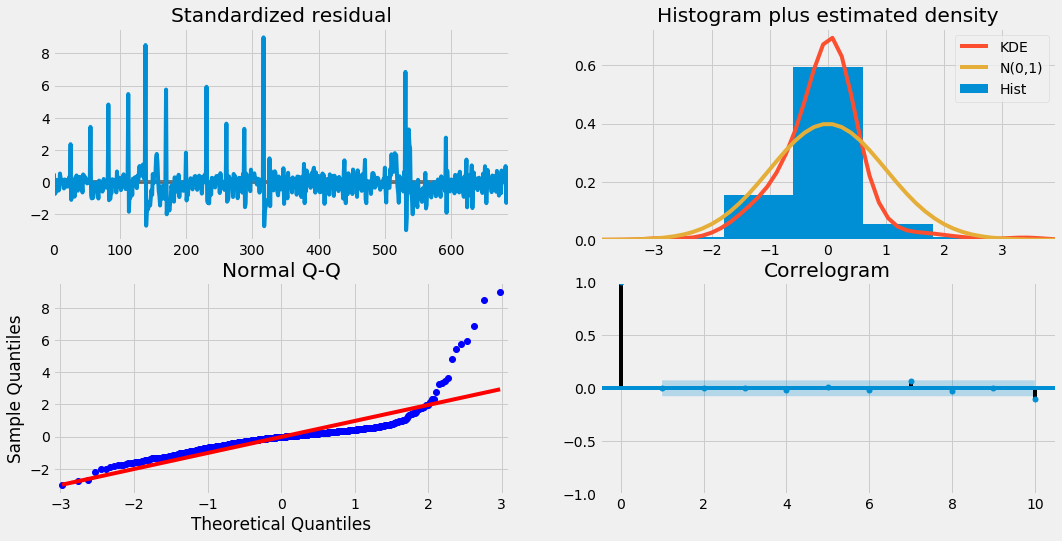

In [34]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [80]:
x=results.get_prediction(n_periods=91)
pred = x.conf_int()
pred

,lower case_count,upper case_count
application_date,,
2017-04-01,-3394.757202,3394.757202
2017-04-03,-4568.683103,5188.288109
2017-04-04,-5095.663327,5475.726073
2017-04-05,-5313.263735,5542.046308
2017-04-07,-4526.865678,6411.309828
2017-04-12,-4368.401993,6592.639715
2017-04-13,-4187.064685,6780.187443
2017-04-14,-4180.919474,6788.012084
2017-04-15,-4169.523391,6799.861787
